# **Step 1- Importing Libraries + Uploading Dataset + separating final test set.** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HRC/1805182.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200770677,KRAS,2019-05-15 00:00:00,2019.0,1.929230e+09,2019-04-30,20190429,20190430,20190515.0,USD,RV,1.0,NaN,23397.22,20190430.0,NAA8,1.929230e+09,0
1,U001,0200777735,NASH us,2019-05-16 00:00:00,2019.0,1.929237e+09,2019-05-03,20190501,20190503,20190518.0,USD,RV,1.0,NaN,16925.40,20190503.0,NAA8,1.929237e+09,0
2,U001,0200748335,FO foundation,2019-10-26 00:00:00,2019.0,1.929968e+09,2019-10-07,20191004,20191007,20191022.0,USD,RV,1.0,NaN,46967.83,20191007.0,NAA8,1.929968e+09,0
3,U001,0200769623,WAL-MAR co,2019-02-25 00:00:00,2019.0,1.928795e+09,2019-02-13,20190213,20190213,20190228.0,USD,RV,1.0,NaN,756.28,20190213.0,NAH4,1.928795e+09,0
4,U001,0100031704,DELHAIZE corporation,2020-01-28 00:00:00,2020.0,1.930371e+09,2020-01-07,20200107,20200107,20200122.0,USD,RV,1.0,NaN,70228.16,20200107.0,NAA8,1.930371e+09,0


In [ ]:
#Creating final test set 
final_test_df = df[df['clear_date'].isnull()]

#Shape of final test set
print('shape of final test dataset: ',final_test_df.shape)

#Updating df = df - final_test_set
df = df.dropna(subset=['clear_date']) 
print('shape of remaining dataset: ',df.shape)

shape of final test dataset:  (4151, 19)
shape of remaining dataset:  (45849, 19)


# **Step 2- Data preprocessing** 

**Step 2.1-  Removing-** 
1.   Null Feature.
2.   Constant Features.
3.   Changing datatype.
4.   Checking for duplicate rows.





In [ ]:
#To know the datatype of features and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 45848
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           45849 non-null  object 
 1   cust_number             45849 non-null  object 
 2   name_customer           45849 non-null  object 
 3   clear_date              45849 non-null  object 
 4   buisness_year           45849 non-null  float64
 5   doc_id                  45849 non-null  float64
 6   posting_date            45849 non-null  object 
 7   document_create_date    45849 non-null  int64  
 8   document_create_date.1  45849 non-null  int64  
 9   due_in_date             45849 non-null  float64
 10  invoice_currency        45849 non-null  object 
 11  document type           45849 non-null  object 
 12  posting_id              45849 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       45849 non-null

In [ ]:
#To identify null and constant feature.
#To guess which 2 features can be duplicate.
df.nunique()

business_code                 6
cust_number                1358
name_customer              4177
clear_date                  399
buisness_year                 2
doc_id                    45849
posting_date                424
document_create_date        429
document_create_date.1      425
due_in_date                 492
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         41642
baseline_create_date        433
cust_payment_terms           70
invoice_id                45843
isOpen                        1
dtype: int64

In [ ]:
#To see how many null values
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             45849
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

**TABLE 1**
> **Assumption-**
1.   Need to check for posting_date, document_create_date,  document_create_date.1, baseline_create_date as they all have almost same number of unique values. So may be duplicate columns.
2.   Need to check for doc_id and invoice_id as they all have almost same number of unique values. So may be duplicate columns. We need to check similarity between all dates.
3.   As invoice_id have 6 null values and 45843 unique values which symbolises that it is a kind of primary key. But we have doc_id as primary key so they may be same. By, observing few rows we can see that they both have same values. So, I'll fill the doc_id value in invoice_id where invoice_id is NULL (change is temporary) and then check if both columns are same or not.
**Conclusion-**
1. area_business is null feature.
2. posting_id and isOpen are constant feature.
3. Datatype of business_year must be changed to int.
4. Datatype of all date columns should be changed to datetime. 



In [ ]:
#TABLE 1 CONCLUSION 1 & 2- Deleting area_business, posting_id, isOpen.
list = ['area_business', 'posting_id', 'isOpen']
df = df.drop(list,1)
df.shape

(45849, 16)

In [ ]:
#TABLE 1 CONCLUSION 3- buisness_year datatype float ---> int.
df['buisness_year'] = df['buisness_year'].astype('int64')

In [ ]:
#TABLE 1 CONCLUSION 4- Changing datatype of all data features. Easy to do operations like calculating delay in payment.

df['baseline_create_date']= df['baseline_create_date'].astype('int64')
df['due_in_date']= df['due_in_date'].astype('int64')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'].astype(str), format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'].astype(str), format='%Y%m%d')
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'].astype(str), format='%Y%m%d')
df['document_create_date']=pd.to_datetime(df['document_create_date'].astype(str), format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'])

df['clear_date']=df['clear_date'].astype(str)
df['clear_date']=df['clear_date'].str.slice(0,10)
df['clear_date']=df['clear_date'].str.replace('-','')
df['clear_date']=pd.to_datetime(df['clear_date'])

In [ ]:
#TABLE 1 ASSUMPTION 1 - Checking by how much date columns are different.

print(df.loc[df['document_create_date.1'] != df['document_create_date']].shape)
print(df.loc[df['document_create_date.1'] != df['posting_date']].shape)
print(df.loc[df['document_create_date.1'] != df['baseline_create_date']].shape)
print()
print(df.loc[df['document_create_date'] != df['posting_date']].shape)
print(df.loc[df['document_create_date'] != df['baseline_create_date']].shape)
print()
print(df.loc[df['baseline_create_date'] != df['posting_date']].shape)

(26586, 16)
(6, 16)
(5137, 16)

(26580, 16)
(31478, 16)

(5143, 16)


**Conclusion-**  Only 6 rows are different in document_create_date.1 and posting_date (i.e 6/45849 = 0.00013). Hence we can delete any one of them and that will be posting date.
        document_create_date can be deleted as we have it's normalized form i.e document_create_date.1



In [ ]:
#Hence drop posting_date.
df = df.drop('posting_date',1)
print(df.shape)

(45849, 15)


In [ ]:
#TABLE 1 ASSUMPTION 2 & 3 - check for invoice_id and doc_id.
print(df['invoice_id'].fillna(df['doc_id']).equals(df['doc_id']))

True


In [ ]:
#True,Hence drop invoice_id
df = df.drop('invoice_id',1)
print(df.shape)

(45849, 14)


In [ ]:
#To view how many duplicate records.
df.duplicated().sum()

0

**Step 2.2- Data Sanity**
> We'll check for-
1.   Spelling mistakes (example- 2019 or 2o19)
2.   range (example- amount>0)
3.   Relationship between dates (example clear_date > document_create_date)





Analysing all kind of features we have-


1. Continous Variable-

In [ ]:
#Column- total_open_amount

#Checking for amount. It must be greater than 0.
print(df[df['total_open_amount']<0].shape)

#RESULT- All ok.

(0, 14)


2. Discrete variable-

In [ ]:
#Checking for business years.
df['buisness_year'].value_counts()

2019    39803
2020     6046
Name: buisness_year, dtype: int64

3. Categorical Variable- Nominal

In [ ]:
#Check for cust_number- By analysing top 20 rows i get to know that all cust_number are not integer, some are in format 'CCCU20'. 
#                     - So we need to check if we have only 2 to 3 values like this or more. If very very few then we'll delete them
#                       assuming that they are wrongly written else not.

sum=0
negative = 0
for i in df['cust_number']:
  try:
    i=int(i)
    if i<0:
      negative = negative + 1
  except:
    sum = sum+1
print('sum = ',sum)
print('negative cust_number = ',negative)

#Result - We'll keep all.

sum =  1531
negative cust_number =  0


In [ ]:
#Check for name_customer. It must not be a number.
sum=0
for i in df['name_customer']:
  try:
    i=int(i)
    sum = sum+1
  except:
    i=str(i)
print(sum)

#RESULT- Nothing is wrong.

0


In [ ]:
#doc_id should always be positive
print(df[df['doc_id']<0].shape)

#RESULT- All ok.

(0, 14)


4. Categorical Variable- Ordinal

In [ ]:
#Check for unique values of business_code.
df['business_code'].value_counts()

U001    41424
CA02     3653
U013      604
U002      159
U005        6
U007        3
Name: business_code, dtype: int64

In [ ]:
#Check for unique values of invoice_currency.
df['invoice_currency'].value_counts() 

USD    42196
CAD     3653
Name: invoice_currency, dtype: int64

In [ ]:
#Check for unique values of cust_payment_terms.
df['cust_payment_terms'].value_counts()

NAA8    18323
NAH4    12211
CA10     3552
NAC6     1468
NAM4     1269
        ...  
NATM        1
BR12        1
NAUX        1
NATX        1
NANC        1
Name: cust_payment_terms, Length: 70, dtype: int64

In [ ]:
#Check for unique values of document type.
df['document type'].value_counts()

RV    45843
X2        6
Name: document type, dtype: int64

**TABLE 2- Checking constraints for date**
> **Specifying arrangment of different dates-** 
1.   clear_date- The day on which customer paid the money.
2.   document_create_date- Date on which invoice document is created. 
3.   document_create_date.1- Date on which invoice document is created. (normalized date)
4.   due_in_date- Date before or on which payment need to be completed.
5.   baseline_create_date- The day on which invoice was created or Date from which the terms of payment apply.
**Conclusion-**
1.   document_create_date.1 or baseline_create_date or document_create_date < clear_date 
2.   clear_date can be before or after due_date.
3.   document_create_date.1 or baseline_create_date or document_create_date < due_in_date
5. document_create_date.1 and baseline_create_date are very similar.

In [ ]:
#Checking how many rows are not folllowing these constraints.

print(df.loc[(df['clear_date']-df['baseline_create_date']).dt.days<0].shape)
print(df.loc[(df['clear_date']-df['document_create_date.1']).dt.days<0].shape)
print(df.loc[(df['clear_date']-df['document_create_date']).dt.days<0].shape)
print(df.loc[(df['due_in_date']-df['baseline_create_date']).dt.days<0].shape)
print(df.loc[(df['due_in_date']-df['document_create_date.1']).dt.days<0].shape)
print(df.loc[(df['due_in_date']-df['document_create_date']).dt.days<0].shape)

(1, 14)
(0, 14)
(1, 14)
(0, 14)
(132, 14)
(173, 14)


In [ ]:
print('Before eliminating wrong records ---> shape = ',df.shape)

df.drop(df.loc[(df['clear_date']-df['baseline_create_date']).dt.days<0].index,inplace=True)
df.drop(df.loc[(df['clear_date']-df['document_create_date.1']).dt.days<0].index,inplace=True)
df.drop(df.loc[(df['clear_date']-df['document_create_date']).dt.days<0].index,inplace=True)
df.drop(df.loc[(df['due_in_date']-df['baseline_create_date']).dt.days<0].index,inplace=True)
df.drop(df.loc[(df['due_in_date']-df['document_create_date.1']).dt.days<0].index,inplace=True)
df.drop(df.loc[(df['due_in_date']-df['document_create_date']).dt.days<0].index,inplace=True)

print('Before eliminating wrong records ---> shape = ',df.shape)

Before eliminating wrong records ---> shape =  (45849, 14)
Before eliminating wrong records ---> shape =  (45675, 14)


# **Step 3- Creating delay column and splitting dataset into train, validation and test set.** 

In [ ]:
#Creating delay column

df['delay'] = (df['clear_date']-df['due_in_date']).dt.days
df.shape

(45675, 15)

In [ ]:
#Sort dataset according to document_create_date.1

df=df.sort_values(by = 'document_create_date.1')
df.reset_index(inplace= True,drop=True)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0200752302,KROGER associates,2019-01-14,2019,1.928531e+09,2018-12-31,2018-12-30,2019-01-14,USD,RV,19717.15,2018-12-30,NAA8,0
1,U001,0200769623,WAL-MAR corp,2019-01-10,2019,1.928534e+09,2018-12-29,2018-12-30,2019-01-14,USD,RV,1448.77,2018-12-30,NAH4,-4
2,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928541e+09,2018-12-29,2018-12-30,2019-01-14,USD,RV,8286.44,2018-12-30,NAH4,-5
3,U001,0200769623,WAL-MAR co,2019-01-09,2019,1.928538e+09,2018-12-29,2018-12-30,2019-01-14,USD,RV,78.95,2018-12-30,NAH4,-5
4,U001,0200769623,WAL-MAR corporation,2019-01-11,2019,1.928540e+09,2018-12-29,2018-12-30,2019-01-14,USD,RV,22480.50,2018-12-30,NAH4,-3


In [ ]:
#Dividing into train, validation and test in ratio 

train = df.iloc[:35675,:].reset_index(drop=True)
val = df.iloc[35675:40675,:].reset_index(drop=True)
test = df.iloc[40675:,:].reset_index(drop=True)
print(train.shape)
print(val.shape)
print(test.shape)

(35675, 15)
(5000, 15)
(5000, 15)


# **Step 4- EDA** 

**Information about dataset-**
1.   **business_code-** Company code of the account.
2.   **cust_number-** Customer number.
3.   **name_customer-** Name of the customer.
4.   **clear_date-** The payment date. (Target Variable)
5.   **buisness_year** 
6.   **doc_id-** Unique id for invoice.
7.   **document_create_date.1-** Date on which document is created. (normalized one)
8.   **due_in_date-** Date on which payment to be done.
9.   **invoice_currency-** Currency.
10.  **document type-** Type of document.
11.  **total_open_amount-** Total amount to pay.
12.  **baseline_create_date-** Date from which the terms of payment apply.
13.  **cust_payment_terms-** Payment terms provide clear details about the expected payment on a sale. It specify how much time the buyer has to make payment on the purchase.
14.  **delay-** difference between clear_date - due_in_date. 


**Step 4.1- Univariate Analysis** 

1. business_code

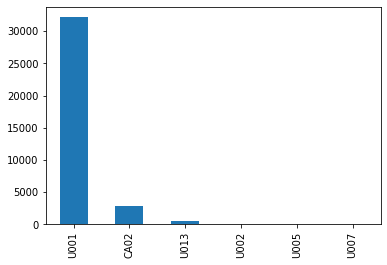

In [ ]:
train['business_code'].value_counts().plot(kind='bar')

Conclusion- Only U001, CA02, U013 shows significant frequency so I'll keep them and else will be mapped to a new code 'UUUU'. So for mapping all index need to be saved.

In [ ]:
business_code_index = train['business_code'].value_counts()[2:].index
print(business_code_index)

Index(['U013', 'U002', 'U005', 'U007'], dtype='object')


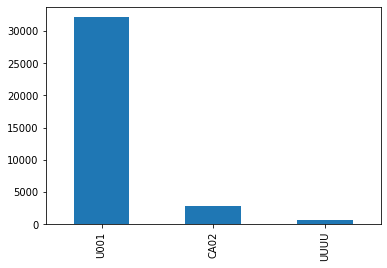

In [ ]:
#Mapping frequent business_code classes on train, val and test dataset.
 
train['business_code'] = train['business_code'].replace(business_code_index , 'UUUU')
train['business_code'].value_counts().plot(kind='bar')

2. cust_number - We can create repeatCust as a feature representing how many time an organisation has generated invoice.

3. invoice_currency

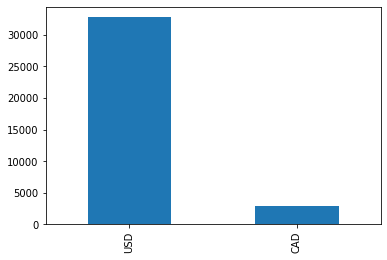

In [ ]:
train['invoice_currency'].value_counts().plot(kind='bar')

Rows where we have invoice_currency = CAD is very low. We need to do more amalysis of it under bivariate analysis.

4. document type

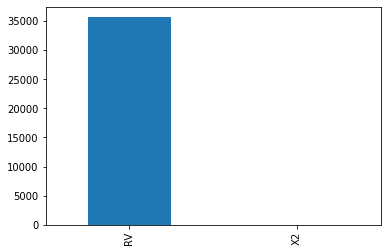

In [ ]:
train['document type'].value_counts().plot(kind='bar')

In [ ]:
train['document type'].value_counts()

RV    35674
X2        1
Name: document type, dtype: int64

Conclusion- No analysis can be done on this column so better to remove.

In [ ]:
#dropping document type
train = train.drop('document type',1)

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0200752302,KROGER associates,2019-01-14,2019,1.928531e+09,2018-12-31,2018-12-30,2019-01-14,USD,19717.15,2018-12-30,NAA8,0
1,U001,0200769623,WAL-MAR corp,2019-01-10,2019,1.928534e+09,2018-12-29,2018-12-30,2019-01-14,USD,1448.77,2018-12-30,NAH4,-4
2,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928541e+09,2018-12-29,2018-12-30,2019-01-14,USD,8286.44,2018-12-30,NAH4,-5
3,U001,0200769623,WAL-MAR co,2019-01-09,2019,1.928538e+09,2018-12-29,2018-12-30,2019-01-14,USD,78.95,2018-12-30,NAH4,-5
4,U001,0200769623,WAL-MAR corporation,2019-01-11,2019,1.928540e+09,2018-12-29,2018-12-30,2019-01-14,USD,22480.50,2018-12-30,NAH4,-3


5. total_open_amount

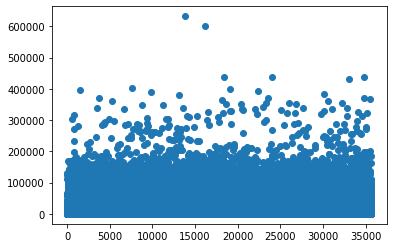

In [ ]:
plt.scatter(train.index,train['total_open_amount'])

**For total_open_amount**
> Here normal scatter plot may give wrong result because we are considering amount in 2 different currencies. So we are analysing them differently i.e with different colours.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


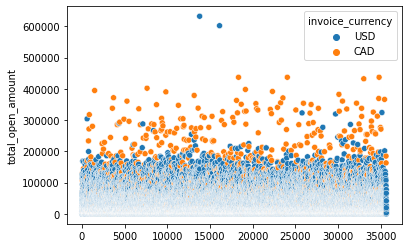

In [ ]:
sns.scatterplot(train.index,train['total_open_amount'],hue=train['invoice_currency'])

CONCLUSION- Except these 2 recods where amount > 500000 graph is uniform in nature. Considering these 2 points as outliers. 

In [ ]:
#Removing outliers
train = train[train['total_open_amount']<500000]

6. cust_payment_terms

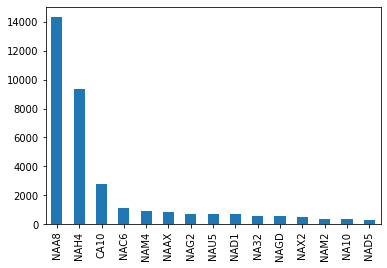

In [ ]:
train['cust_payment_terms'].value_counts()[:15].plot(kind='bar')

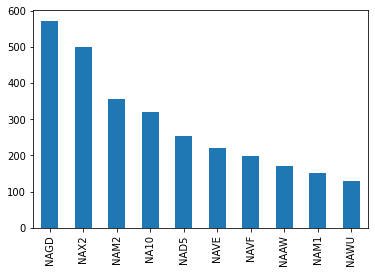

In [ ]:
train['cust_payment_terms'].value_counts()[10:20].plot(kind='bar')

Conclusion- After analysing these two i decided threshold as 350 i.e approx 0.01. So, i'll keep till index 11. Only these 11 mill be mapped individually. Rest are to be mapped under one label 'NNNN'.

In [ ]:
#Storing non-frequent categories
cust_payment_terms_index = train['cust_payment_terms'].value_counts()[12:].index
print(cust_payment_terms_index)

Index(['NAM2', 'NA10', 'NAD5', 'NAVE', 'NAVF', 'NAAW', 'NAM1', 'NAWU', 'NAWN',
       'NAVR', 'NAVQ', 'NAUZ', 'NAWP', 'NA3B', 'NAVM', 'NACB', 'NA38', 'NABG',
       'CA30', 'NAD4', 'NAB1', 'NA9X', 'C106', 'NAVL', 'BR56', 'NA3F', 'NA25',
       'NAVD', 'NA84', 'NA8Q', 'NA31', 'NAUP', 'NATL', 'NAVC', 'NAV2', 'NAUI',
       'NATU', 'NATH', 'NATK', 'NATW', 'CA60', 'CAB1', 'NAV9', 'NAD8', 'B112',
       'CAX2', 'NATM', 'NATV', 'B052', 'NAWM', 'NATX', 'C129', 'BR12', 'NANC',
       'NAUX', 'NAM3'],
      dtype='object')


In [ ]:
#Replacing with 'NNNN' in train
train['cust_payment_terms'] = train['cust_payment_terms'].replace(cust_payment_terms_index , 'NNNN')
train['cust_payment_terms'].value_counts()

NAA8    14338
NAH4     9335
CA10     2796
NNNN     2600
NAC6     1143
NAM4      920
NAAX      800
NAG2      707
NAU5      702
NAD1      683
NA32      576
NAGD      573
NAX2      500
Name: cust_payment_terms, dtype: int64

7. delay

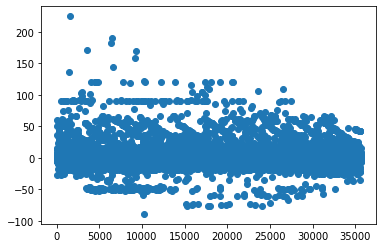

In [ ]:
plt.scatter(train.index,train['delay'])

Conclusion- yes, we can see some outliers but i wanted to assign upper and lower value instead of deleting it.


In [ ]:
#Taking extreme boundaries with n = 3

IQR = train['delay'].quantile(0.75)-train['delay'].quantile(0.25)
lower = train['delay'].quantile(0.25)- 3*IQR
upper = train['delay'].quantile(0.75)+ 3*IQR
print(lower)
print(upper)

-18.0
17.0


But these values are very small. So i decided to delete the outliers.

In [ ]:
train=train[(train['delay']<100) & (train['delay']>-50)]

**Step 4.2- Multivariate analysis** 

1. business_code vs delay

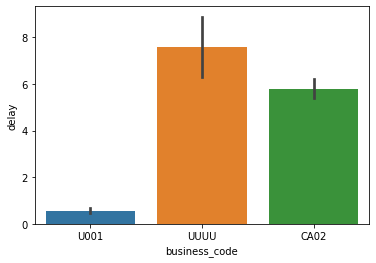

In [ ]:
sns.barplot(x ='business_code', y ='delay', data = train, estimator = np.mean) 

Here we can see that delay for U001 is lowest and highest for UUUU. This can be one-one feature but as we'll do one hot encoding so these features will automatically get generated.

**Conclusion-** I made this delay column for better analysis. In sns bar graph we have one parameter 'hue' and i when i write hue = train['delay'] will help me analysing +ve and -ve delay seperately.

2.  invoice_currency

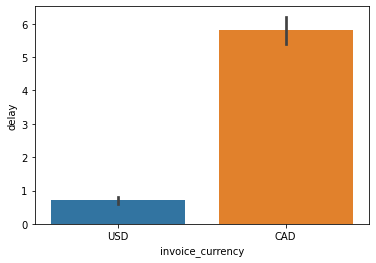

In [ ]:
sns.barplot(x ='invoice_currency', y ='delay', data = train, estimator = np.mean) 

3. total_open_amount

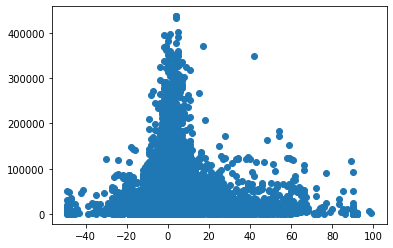

In [ ]:
plt.scatter(train['delay'],train['total_open_amount'])

Here we can see that amount > 150000 shows very less delay. So this can be one feature.

4. cust_payment_terms

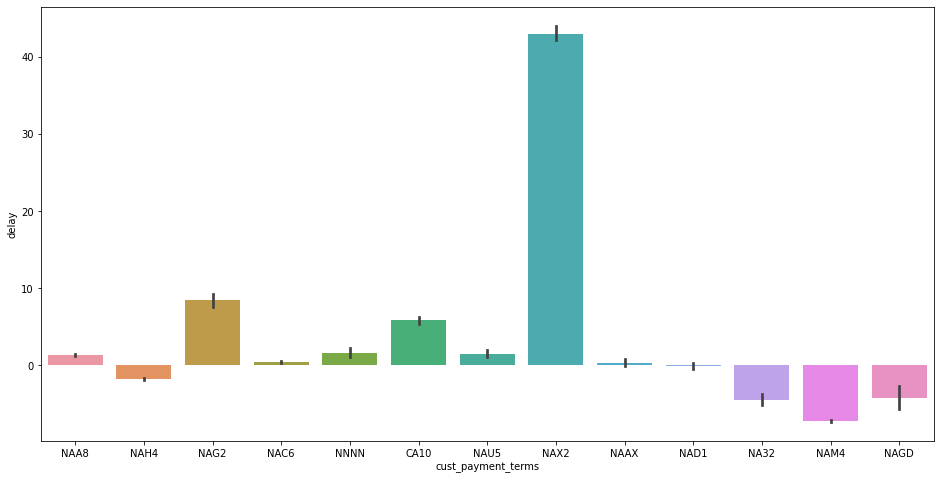

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x =train['cust_payment_terms'], y =train['delay'])

In [ ]:
train['Late'] = train['delay'].apply(lambda x: 1 if x >0 else 0)

**For every date column i'm going to analyse-** 
> 1. date.month vs delay (+ve/-ve seperatly)
2. date.month vs delay 
3. date.quarter vs delay (+ve/-ve seperatly)
4. date.quarter vs delay 
5. date.dayofweek vs delay (+ve/-ve seperatly)
6. date.dayofweek vs delay 
7. per 7-7 days in month vs delay (+ve/-ve seperatly)
8. per 7-7 days in month vs delay 
9. date.day vs delay






5. document_create_date

5.1 document_create_date.month vs delay (+ve/-ve seperatly)

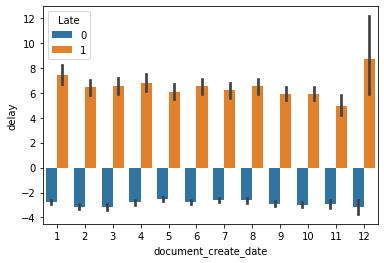

In [ ]:
sns.barplot(x=train['document_create_date'].dt.month,y=train['delay'],hue=train['Late'])

In dec +ve delay is very high. I'll make column where 1 represent month = 12 & delay is postive and 0 for rest records.

5.2 document_create_date.month vs delay

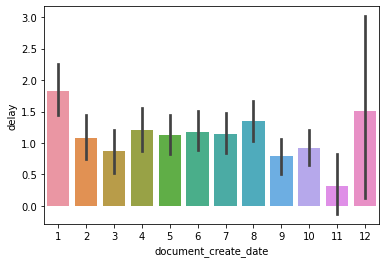

In [ ]:
sns.barplot(x=train['document_create_date'].dt.month,y=train['delay'])

In jan and dec - Highset delay and In nov - Lowest delay.

5.3 date.quarter vs delay (+ve/-ve seperatly)

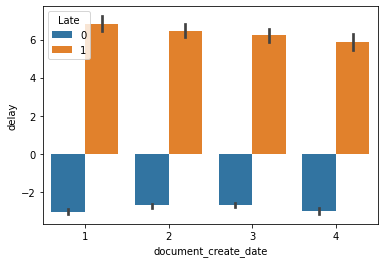

In [ ]:
sns.barplot(x=train['document_create_date'].dt.quarter,y=train['delay'],hue=train['Late'])

Here we can see that there is uniform decreasing trend. So i'll add one quarter column.

5.4 date.quarter vs delay 

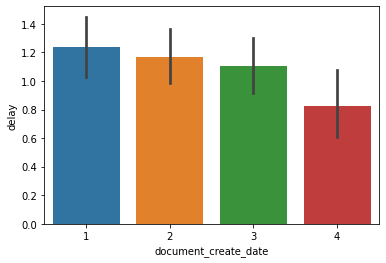

In [ ]:
sns.barplot(x=train['document_create_date'].dt.quarter,y=train['delay'])

5.5 date.dayofweek vs delay (+ve/-ve seperatly)

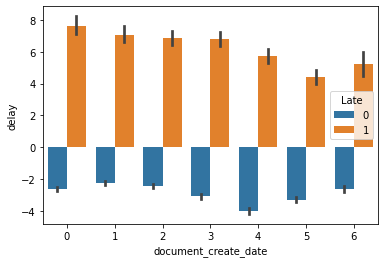

In [ ]:
sns.barplot(x=train['document_create_date'].dt.dayofweek,y=train['delay'],hue=train['Late'])

Conclusion-
1.   At 0 positive delay is high
2.   At 5 positive delay is low
3.   At 4 negative delay is high






5.6 date.dayofweek vs delay

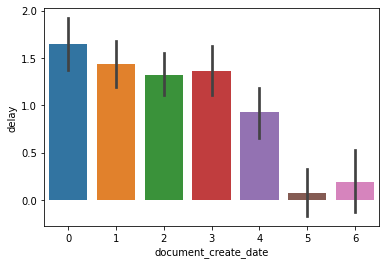

In [ ]:
sns.barplot(x=train['document_create_date'].dt.dayofweek,y=train['delay'])

There is a uniform trend between dayofweek of dcd and delay. Day 5&6 is very important as delay is very low. So I'll create 2 features-
1.   Which day i.e 0 to 6
2.   special feature for day = 5 and 6.
3.   special feature for day = 0.



In [ ]:
#Function to divide month into 7-7 days for both =ve and -ve.

def week_of_month(k):
  day_p=[]
  day_n=[]
  for i in range(5):
    t=0
    if i==4:
      t=t+1
    day_p.append(train.loc[(train[k].dt.day.between(1+7*i,7+7*i+t,inclusive = True)) & (train['delay']>=0)]['delay'].mean())
    day_n.append(train.loc[(train[k].dt.day.between(1+7*i,7+7*i+t,inclusive = True)) & (train['delay']<0)]['delay'].mean())
  return day_p,day_n

5.7 per 7-7 days in month vs delay (+ve/-ve seperatly)

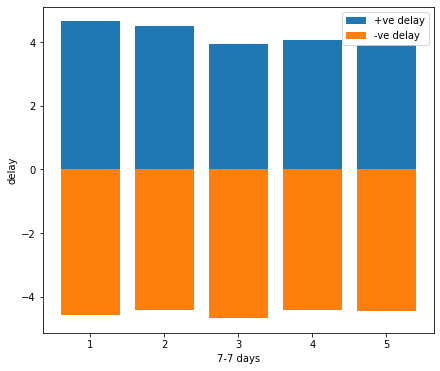

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
day_p,day_n = week_of_month('document_create_date')
plt.bar(bins,day_p,label='+ve delay')
plt.bar(bins, day_n,label='-ve delay')
plt.xlabel("7-7 days") 
plt.ylabel("delay") 
plt.legend()
plt.show() 

Almost no variation. 

In [ ]:
#Function to divide month into 7-7 days for both =ve and -ve.

def week_of_month_all(k):
  week=[]
  for i in range(5):
    t=0
    if i==4:
      t=t+1
    week.append(train.loc[train[k].dt.day.between(1+7*i,7+7*i+t,inclusive = True)]['delay'].mean())
  return week

5.8 per 7-7 days in month vs delay 

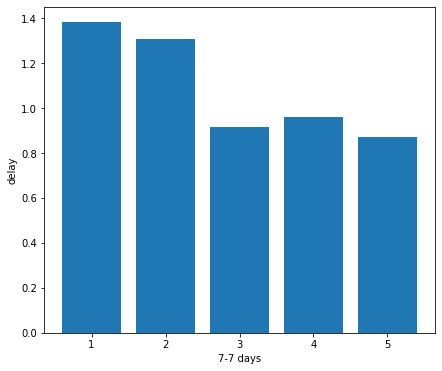

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
week = week_of_month_all('document_create_date')
plt.bar(bins,week)
plt.xlabel("7-7 days") 
plt.ylabel("delay")
plt.show() 

In 3rd week delay is lowest and in 1st week delay is highest.

5.9 date.day vs delay

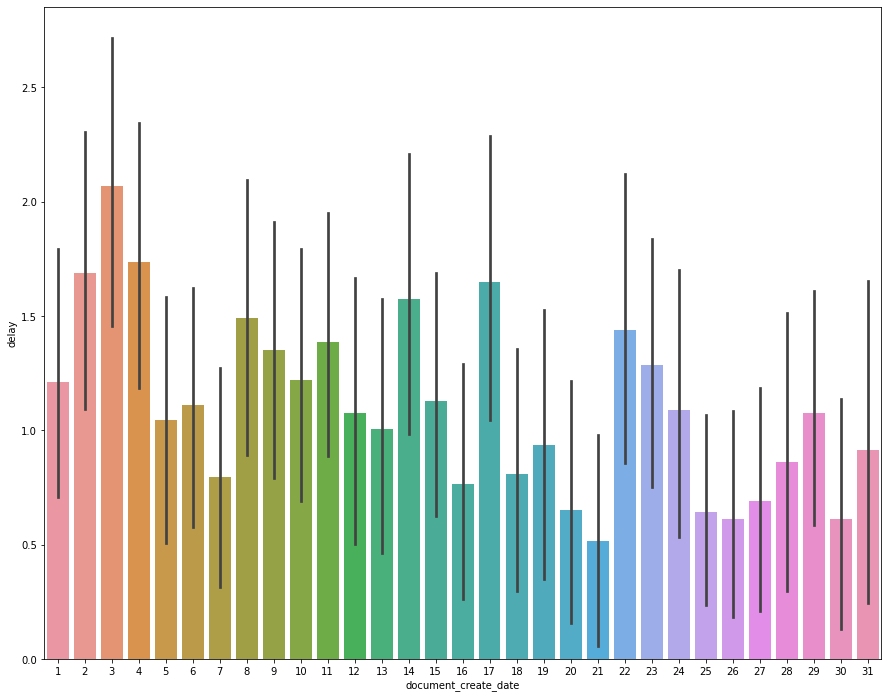

In [ ]:
plt.figure(figsize = (15, 12))
sns.barplot(x=train['document_create_date'].dt.day,y=train['delay'])

On day 3 & 17 delay is highest and on day 21 delay is lowest.

6. document_create_date.1

6.1 date.month vs delay (+ve/-ve seperatly)

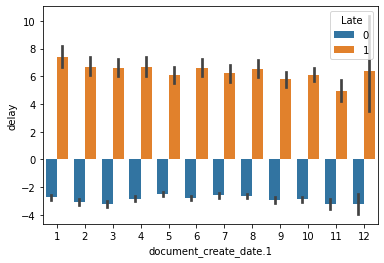

In [ ]:
sns.barplot(x=train['document_create_date.1'].dt.month,y=train['delay'],hue=train['Late'])

6.2 date.month vs delay 

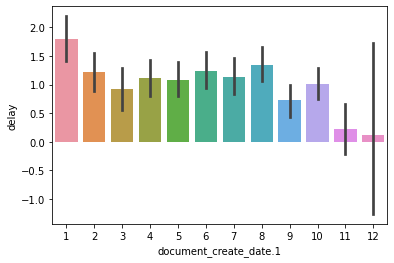

In [ ]:
sns.barplot(x=train['document_create_date.1'].dt.month,y=train['delay'])

mean dalay is very less for month = 11 & 12 and high for 1 & 6.

6.3 date.quarter vs delay (+ve/-ve seperatly)

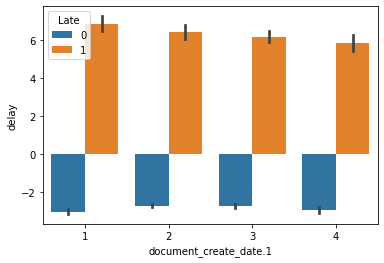

In [ ]:
sns.barplot(x=train['document_create_date.1'].dt.quarter,y=train['delay'],hue=train['Late'])

6.4 date.quarter vs delay

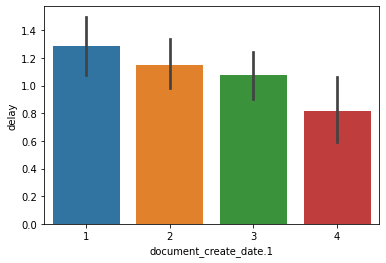

In [ ]:
sns.barplot(x=train['document_create_date.1'].dt.quarter,y=train['delay'])

Both 6.3 and 6.4 are same as document_create_date.

6.5 date.dayofweek vs delay (+ve/-ve seperatly)

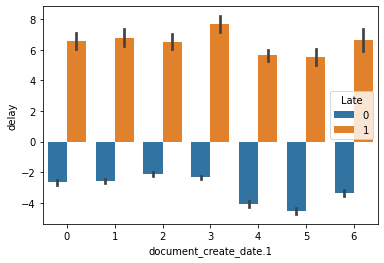

In [ ]:
sns.barplot(x=train['document_create_date.1'].dt.dayofweek,y=train['delay'],hue=train['Late'])

6.6 date.dayofweek vs delay

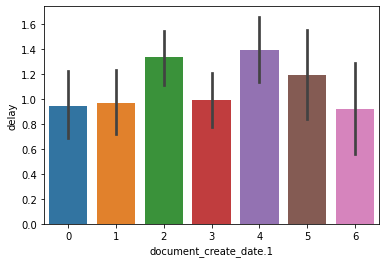

In [ ]:
sns.barplot(x=train['document_create_date.1'].dt.dayofweek,y=train['delay'])

Delay is high on day = 2 and 4.

6.7 per 7-7 days in month vs delay (+ve/-ve seperatly)

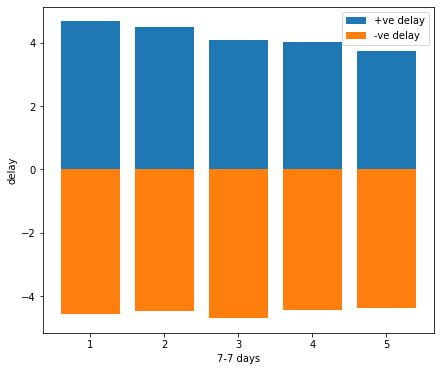

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
day_p,day_n = week_of_month('document_create_date.1')
plt.bar(bins,day_p,label='+ve delay')
plt.bar(bins, day_n,label='-ve delay')
plt.xlabel("7-7 days") 
plt.ylabel("delay") 
plt.legend()
plt.show() 

6.8 per 7-7 days in month vs delay

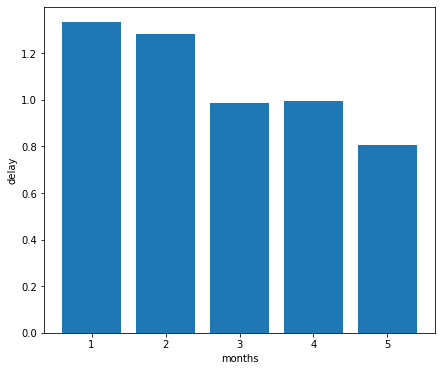

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
week = week_of_month_all('document_create_date.1')
plt.bar(bins,week)
plt.xlabel("months") 
plt.ylabel("delay") 
plt.show() 

Same as document_create_date.1

6.9 date.day vs delay

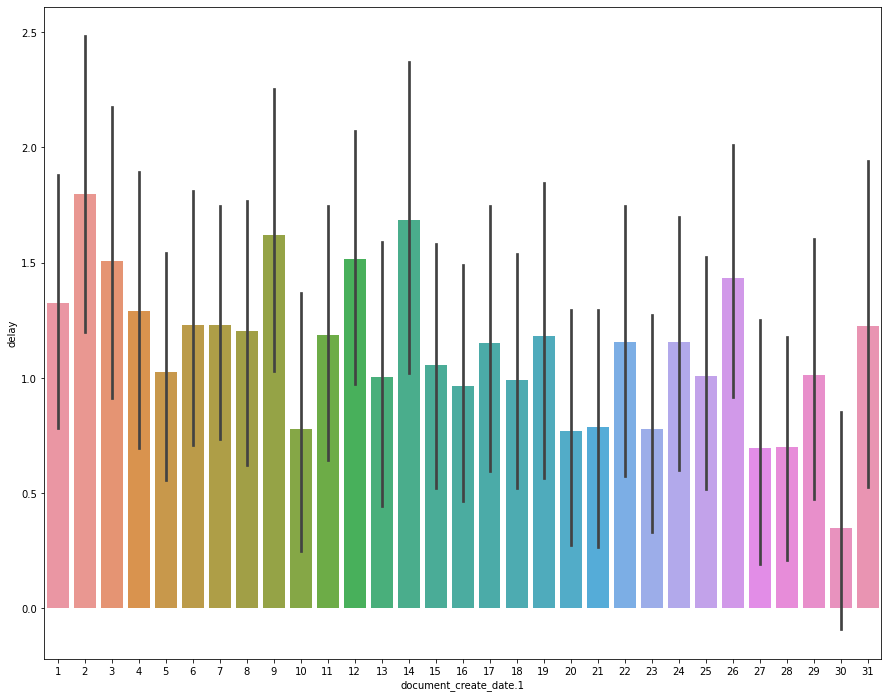

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=train['document_create_date.1'].dt.day,y=train['delay'])

On date=2,3,9,14 delay is high and on date 20,21,27,30 it is low.

7. due_in_date

7.1 date.month vs delay (+ve/-ve seperatly)

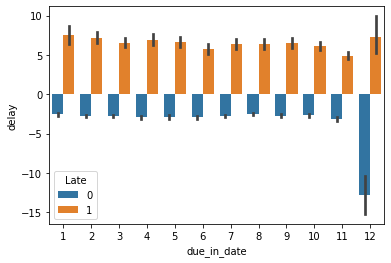

In [ ]:
sns.barplot(x=train['due_in_date'].dt.month,y=train['delay'],hue=train['Late'])

Negative Delay is very high in month = 12.

7.2 date.month vs delay 

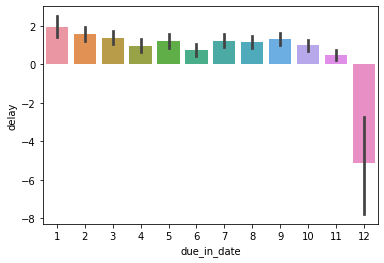

In [ ]:
sns.barplot(x=train['due_in_date'].dt.month,y=train['delay'])

Negative Delay is very high in month = 12  (same as above). Positive delay is very low in month = 11.

7.3 date.quarter vs delay (+ve/-ve seperatly)

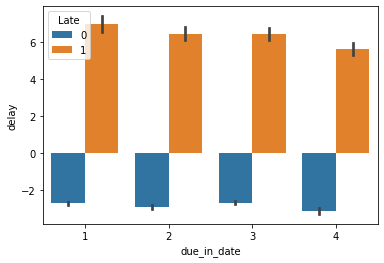

In [ ]:
sns.barplot(x=train['due_in_date'].dt.quarter, y=train['delay'],hue=train['Late'])

Same as both document_create_date and document_create_date.1

7.4 date.quarter vs delay

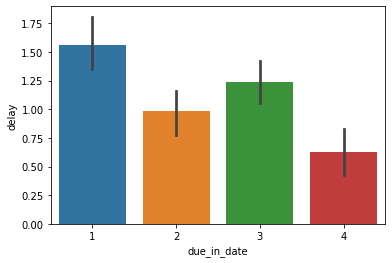

In [ ]:
sns.barplot(x=train['due_in_date'].dt.quarter, y=train['delay'])

In quarter 1 delay is highest and in quarter 4 delay is lowest.

7.5 date.dayofweek vs delay (+ve/-ve seperatly)

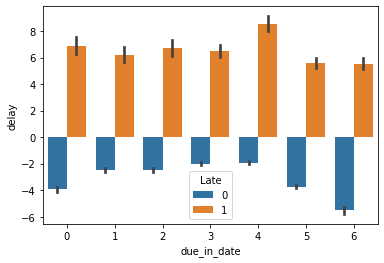

In [ ]:
sns.barplot(x=train['due_in_date'].dt.dayofweek, y=train['delay'],hue=train['Late'])

At 4 positive delay is very high and at 1,3,4, negative delay is very low. 

7.6 date.dayofweek vs delay 

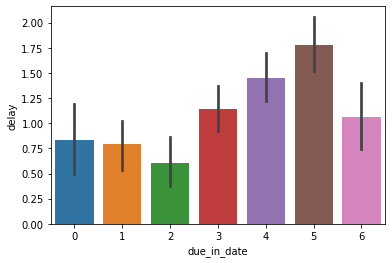

In [ ]:
sns.barplot(x=train['due_in_date'].dt.dayofweek, y=train['delay'])

Delay is lowest on day = 2 and highest on day = 5 and 4. 

7.7 per 7-7 days in month vs delay (+ve/-ve seperatly)

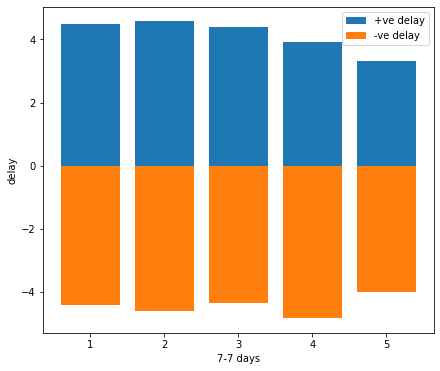

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
day_p,day_n = week_of_month('due_in_date')
plt.bar(bins,day_p,label='+ve delay')
plt.bar(bins, day_n,label='-ve delay')
plt.xlabel("7-7 days") 
plt.ylabel("delay") 
plt.legend()
plt.show()

7.8 per 7-7 days in month vs delay

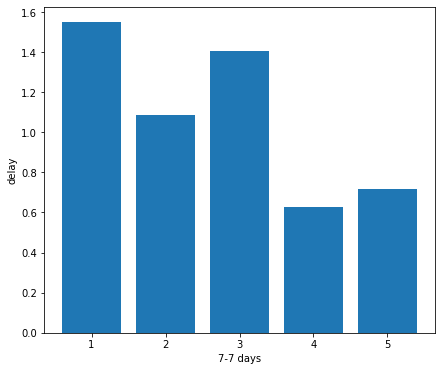

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
week = week_of_month_all('due_in_date')
plt.bar(bins,week)
plt.xlabel("7-7 days") 
plt.ylabel("delay") 
plt.show() 

delay highest in week 1 and low in both 4 and 5.

7.9 date.day vs delay

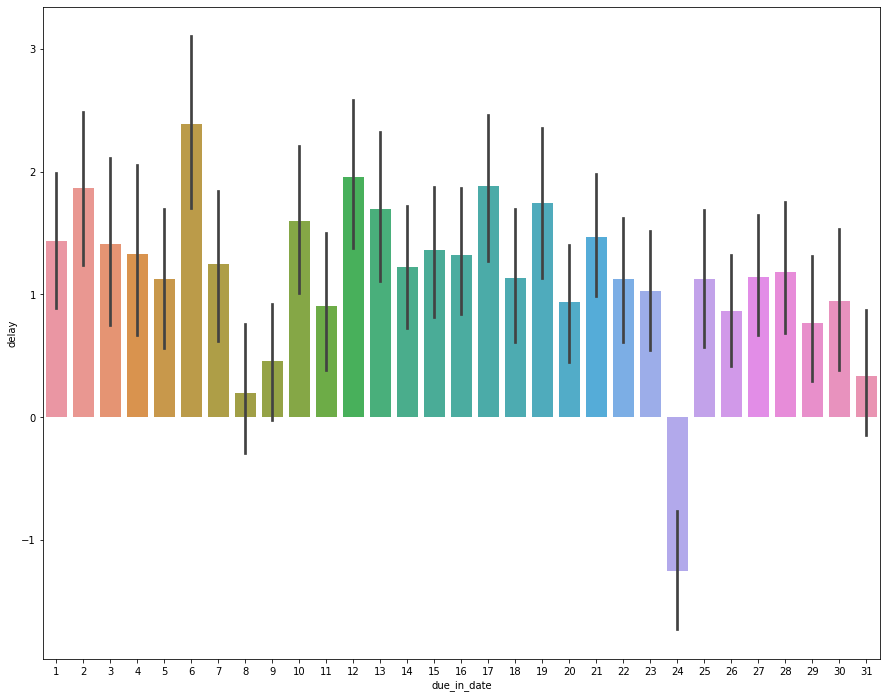

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=train['due_in_date'].dt.day,y=train['delay'])

Conclusion-

>1.   High delay- On day 6,12,17
2.   Low  delay- On day 8,9,31
3.  Lowest delay- On day 24





8. baseline create date

8.1 date.month vs delay (+ve/-ve seperatly)

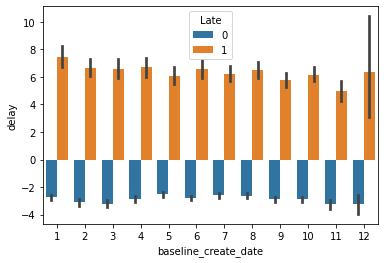

In [ ]:
sns.barplot(x=train['baseline_create_date'].dt.month,y=train['delay'],hue=train['Late'])

8.2  date.month vs delay 

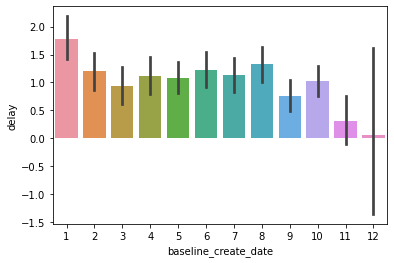

In [ ]:
sns.barplot(x=train['baseline_create_date'].dt.month,y=train['delay'])

In month 1 & 6 delay is high and in 11 & 12 delay is low.

8.3 date.quarter vs delay (+ve/-ve seperatly)

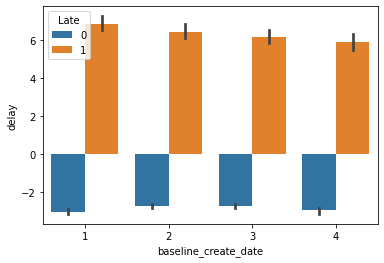

In [ ]:
sns.barplot(x=train['baseline_create_date'].dt.quarter, y=train['delay'],hue=train['Late'])

8.4 date.quarter vs delay

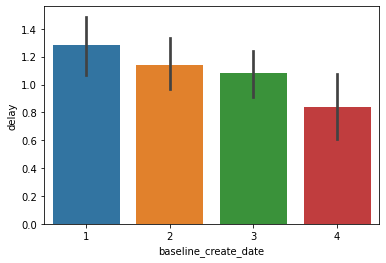

In [ ]:
sns.barplot(x=train['baseline_create_date'].dt.quarter, y=train['delay'])

Above both graphs are similar to graphs of document_create_date.1

8.5 date.dayofweek vs delay (+ve/-ve seperatly)

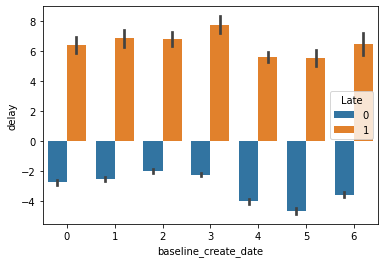

In [ ]:
sns.barplot(x=train['baseline_create_date'].dt.dayofweek, y=train['delay'],hue=train['Late'])

8.6 date.dayofweek vs delay 

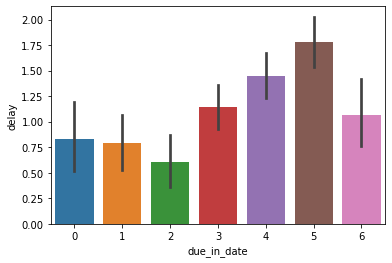

In [ ]:
sns.barplot(x=train['due_in_date'].dt.dayofweek, y=train['delay'])

Above graph same as of due_in_date.

8.7 per 7-7 days in month vs delay (+ve/-ve seperatly)

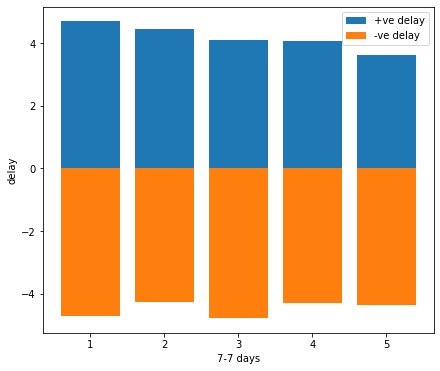

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
day_p,day_n = week_of_month('baseline_create_date')
plt.bar(bins,day_p,label='+ve delay')
plt.bar(bins, day_n,label='-ve delay')
plt.xlabel("7-7 days") 
plt.ylabel("delay") 
plt.legend()
plt.show() 

8.8 per 7-7 days in month vs delay 

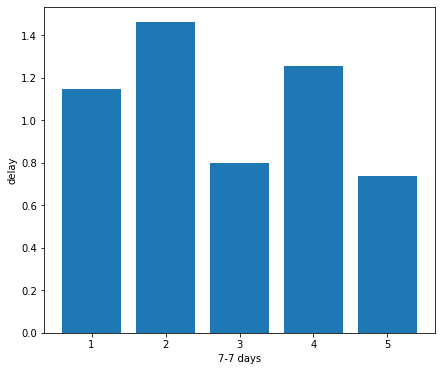

In [ ]:
bins=[1,2,3,4,5]
plt.figure(figsize = (7, 6))
week = week_of_month_all('baseline_create_date')
plt.bar(bins,week)
plt.xlabel("7-7 days") 
plt.ylabel("delay") 
plt.show() 

Conclusion- In second week delay is high and low in 3 & 5.

8.9 date.day vs delay

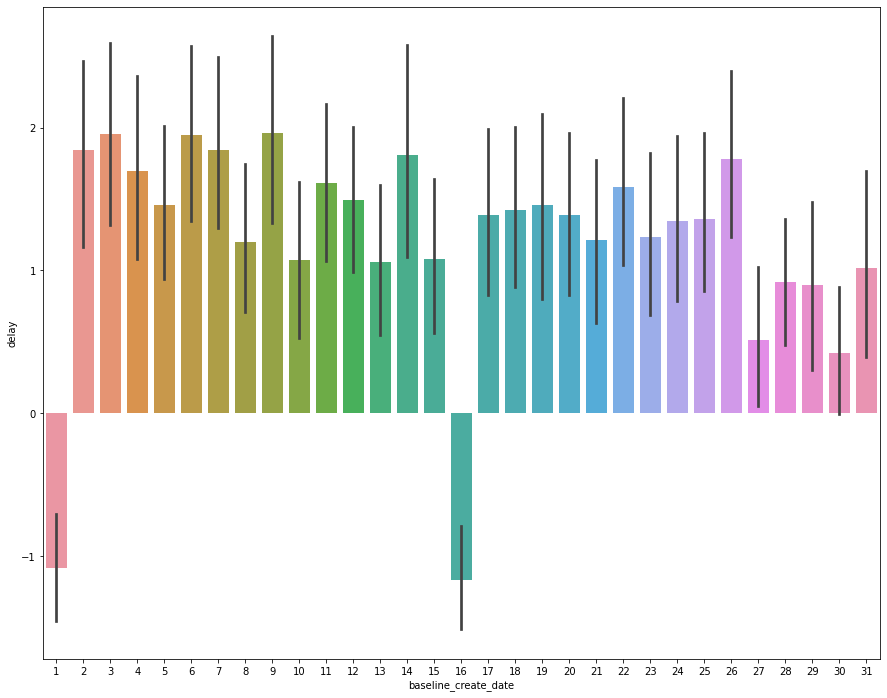

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x=train['baseline_create_date'].dt.day,y=train['delay'])

Delay low on day 1,16 and high on 2,3,6,7,9.

9. document_create_date - document_create_date.1

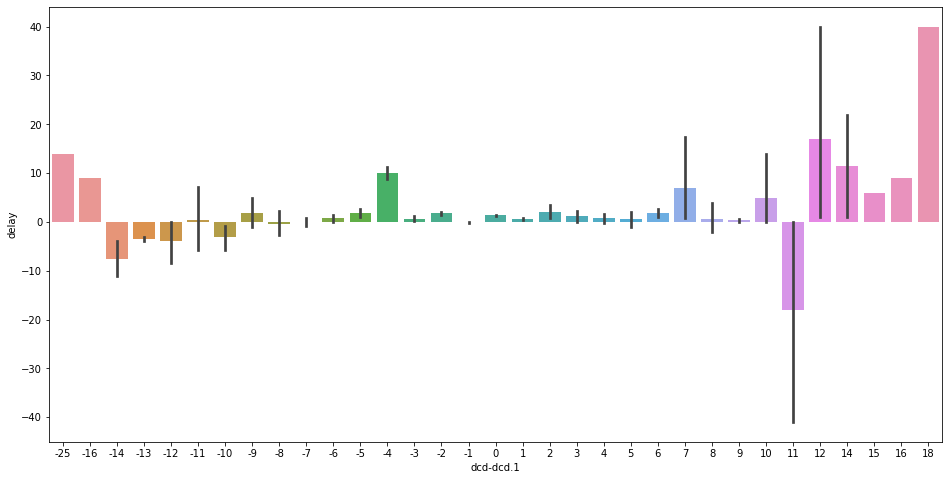

In [ ]:
train['dcd-dcd.1'] = (train['document_create_date']- train['document_create_date.1']).dt.days
plt.figure(figsize=(16,8))
sns.barplot(x =train['dcd-dcd.1'], y=train['delay'])

High- [0,10,12,18] and low - [-11,-8,-7,-6,-5,-3,-2,-1,0,1,2,3,4,5,6,8,9] 

10. due_in_date - document_create_date.1

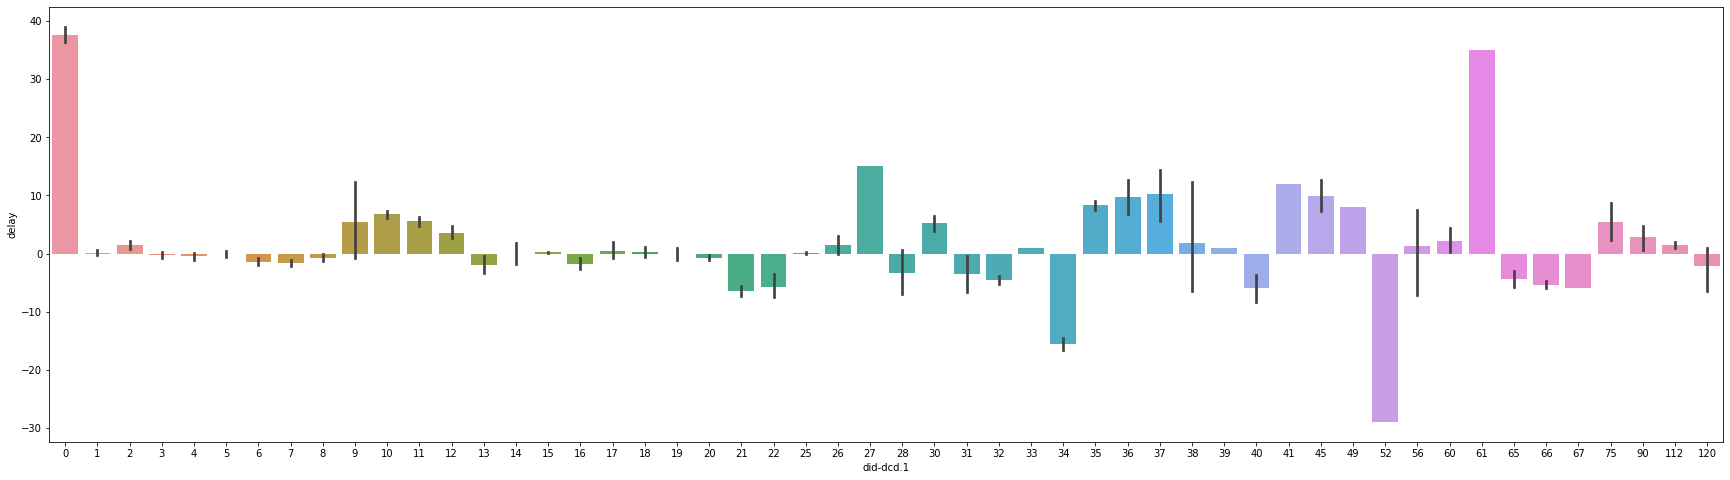

In [ ]:
train['did-dcd.1'] = (train['due_in_date']-train['document_create_date.1']).dt.days
plt.figure(figsize=(30,8))
sns.barplot(x =train['did-dcd.1'], y =train['delay'])

In [ ]:
train[train['did-dcd.1']==61].shape

(1, 17)

In [ ]:
train[train['did-dcd.1']==0].shape

(558, 17)

Delay is very high when did-dcd.1 =0 but I'm not considering 61 because it's just one value.

11. due_in_date - baseline_create_date vs delay

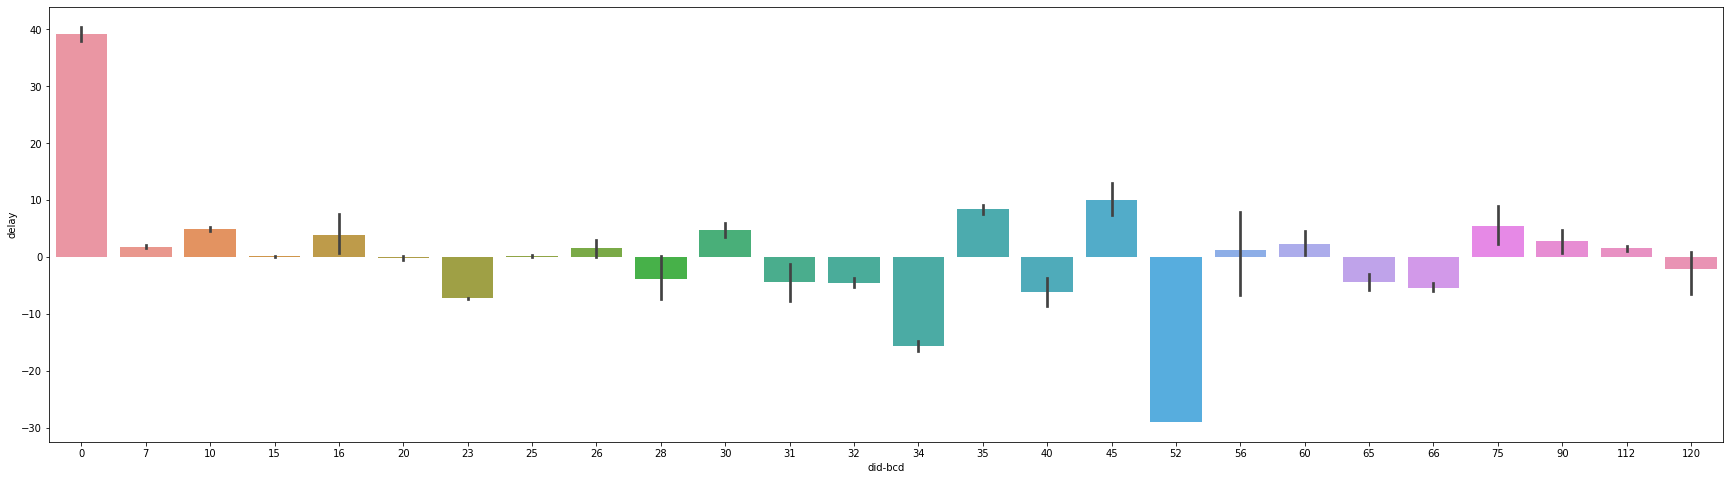

In [ ]:
train['did-bcd'] = (train['due_in_date']-train['baseline_create_date']).dt.days
plt.figure(figsize=(30,8))
sns.barplot(x =train['did-bcd'], y =train['delay'])

In [ ]:
train[train['did-dcd.1']==0].shape

(558, 18)

Delay is very high when did-dcd.1 =0 but I'm not considering 61 because it's just one value.

# **Step 5- Feature Engineering** 

In [ ]:
train.shape

(35511, 18)

1. business_code- One hot encoding

In [ ]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
temp = one_hot_encoder.fit_transform(train[['business_code']]).astype('int')
temp= pd.DataFrame(temp.toarray(), columns=one_hot_encoder.categories_)

In [ ]:
train = train.join(temp)
train.shape

(35511, 21)

2. invoice_currency- One hot encoding

In [ ]:
temp = one_hot_encoder.fit_transform(train[['invoice_currency']]).astype('int')
temp= pd.DataFrame(temp.toarray(), columns=one_hot_encoder.categories_)
train = train.join(temp)
train.shape

(35511, 23)

3. Amount > 150000

In [ ]:
#delay for most of the records where amount greater or equal to 150000 is between [mean()-3*std(),mean()+3*std()] i.e [-25.30,36.69]
train['amount_g&e_to_150000']=train['total_open_amount'].apply(lambda x: 1 if x>=150000 else 0)

4. cust_payment_terms- One hot encoding

In [ ]:
temp = one_hot_encoder.fit_transform(train[["cust_payment_terms"]])
temp= pd.DataFrame(temp.toarray(), columns=one_hot_encoder.categories_)
train = train.join(temp)

5. document_create_date

In [ ]:
#FROM 5.1
train['dcd_month=+12'] = train['document_create_date'].apply(lambda x: 1 if x.month == 12 else 0)

In [ ]:
#From 5.2
train['dcd_month=11&12'] = train['document_create_date'].apply(lambda x: 1 if x.month == 11 or x.month == 12 else 0).astype('int')
train['dcd_month=1'] = train['document_create_date'].apply(lambda x: 1 if x.month == 11 else 0).astype('int')

In [ ]:
#From 5.3
train['dcd_Quarter']= train['document_create_date'].dt.quarter

In [ ]:
#From 5.5
train['dcd_day=+0'] = train['document_create_date'].apply(lambda x: 1 if x.dayofweek == 0 else 0)
train['dcd_day=+5'] = train['document_create_date'].apply(lambda x: 1 if x.dayofweek == 5 else 0)
train['dcd_day=-4'] = train['document_create_date'].apply(lambda x: 1 if x.dayofweek == 4 else 0)
train['dcd_day=-4'] = train['dcd_day=-4'].fillna(0).astype('int')

In [ ]:
#From 5.6
train['dcd_day'] = train['document_create_date'].dt.dayofweek
train['dcd_day=0'] = train['document_create_date'].apply(lambda x: 1 if x.day == 1 else 0).astype('int')
train['dcd_day=5&6'] = train['document_create_date'].apply(lambda x: 1 if x.day == 5 or x.day == 6 else 0).astype('int')

In [ ]:
#From 5.8
train['dcd_weekofmonth=3'] = train['document_create_date'].apply(lambda x: 1 if x.day in [15,16,17,18,19,20,21] else 0)
train['dcd_weekofmonth=1'] = train['document_create_date'].apply(lambda x: 1 if x.day in [1,2,3,4,5,6,7] else 0)

In [ ]:
#From 5.9
train['dcd_date=3or17'] = train['document_create_date'].apply(lambda x: 1 if x.day==3 or x.day==17 else 0)
train['dcd_date=21'] = train['document_create_date'].apply(lambda x: 1 if x.day==21 else 0)

6. document_create_date.1

In [ ]:
#FRom 6.1 
train['dcd.1_month=+11'] = train['document_create_date'].apply(lambda x: 1 if x.month == 11 else 0)
train['dcd.1_month=-5'] = train['document_create_date'].apply(lambda x: 1 if x.month == 11 else 0)

In [ ]:
#From 6.2
train['dcd.1_month=11or12']= train['document_create_date.1'].apply(lambda x: 1 if x.month==11 or x.month==12 else 0).astype('int')
train['dcd.1_month=1or6']= train['document_create_date.1'].apply(lambda x: 1 if x.month==1 or x.month== 6 else 0).astype('int')

In [ ]:
#From 6.6
train['dcd.1_dayofweek=2or4'] = train['document_create_date.1'].apply(lambda x: 1 if x.dayofweek==2 or x.dayofweek==4 else 0).astype('int')

In [ ]:
#From 6.9 
train['dcd.1_day=20,21,27,30'] = train['document_create_date.1'].apply(lambda x: 1 if x.day in [20,21,27,30] else 0).astype('int')
train['dcd.1_day=2,3,9,14'] = train['document_create_date.1'].apply(lambda x: 1 if x.day in [2,3,9,14] else 0).astype('int')

7. due_in_date

In [ ]:
#From 7.1
train['did_month=-12'] = train['due_in_date'].apply(lambda x: 1 if x.month==12 else 0)

In [ ]:
#From 7.2
train['did_month=11'] = train['due_in_date'].apply(lambda x: 1 if x.month==11 else 0)
train['did_month=12'] = train['due_in_date'].apply(lambda x: 1 if x.month==12 else 0)

In [ ]:
#From 7.4
train['did_quarter=1'] = train['due_in_date'].apply(lambda x: 1 if x.quarter==1 else 0)
train['did_quarter=4'] = train['due_in_date'].apply(lambda x: 1 if x.quarter==4 else 0)

In [ ]:
#From 7.5
train['din_dayofweek=+4'] = train['due_in_date'].apply(lambda x: 1 if x.dayofweek ==4 else 0)
train['did_dayofweek=-1,-3,-4'] = train['due_in_date'].apply(lambda x: 1 if x.dayofweek in [1,3,4] else 0)

In [ ]:
#From 7.6
train['did_day=2'] = train['due_in_date'].apply(lambda x: 1 if x.dayofweek==2 else 0) 
train['did_day=4&5'] = train['due_in_date'].apply(lambda x: 1 if x.dayofweek==4 or x.dayofweek==5 else 0) 

In [ ]:
#From 7.8
train['did_week_of_month=4or5'] = train['due_in_date'].apply(lambda x: 1 if x.day in [22,23,24,25,26,27,28,29,30,31] else 0)
train['did_week_of_month=1'] = train['due_in_date'].apply(lambda x: 1 if x.day in [1,2,3,4,5,6,7] else 0)

In [ ]:
#From 7.9
train['did_day=6,12,17'] = train['due_in_date'].apply(lambda x: 1 if x.day in [6,12,17] else 0).astype('int')
train['did_day=8,9,31'] = train['due_in_date'].apply(lambda x: 1 if x.day in [8,9,31] else 0).astype('int')
train['did_day=24'] = train['due_in_date'].apply(lambda x: 1 if x.day==24 else 0).astype('int')

8. baseline_create_date

In [ ]:
#From 8.2
train['bcd_month=11&12'] = train['baseline_create_date'].apply(lambda x: 1 if x.month==11 or x.month==12 else 0)
train['bcd_month=1&6'] = train['baseline_create_date'].apply(lambda x: 1 if x.month==1 or x.month==6 else 0)

In [ ]:
#From 8.8 
train['bcd_weekofmonth=2'] = train['baseline_create_date'].apply(lambda x: 1 if x.day in [8,9,10,11,12,13,14] else 0)
train['bcd_weekofmonth=3&5'] = train['baseline_create_date'].apply(lambda x: 1 if x.day in [15,16,17,18,19,20,21,29,30,31] else 0)

In [ ]:
#From 8.9 
train['bcd_day=1or16'] = train['baseline_create_date'].apply(lambda x: 1 if x.day==1 or x.day==16 else 0)
train['bcd_day=2,3,6,7,9'] = train['baseline_create_date'].apply(lambda x: 1 if x.day in [2,3,6,7,9]  else 0)

9. document_create_date - document_create_date.1 vs delay

In [ ]:
train['dcd-dcd.1=10,12,18'] = train['dcd-dcd.1'].apply(lambda x: 1 if x in [0,10,12,18]  else 0)
train['dcd-dcd.1=-11,-8to-5,-3to6,8,9'] = train['dcd-dcd.1'].apply(lambda x: 1 if x in [-11,-8,-7,-6,-5,-3,-2,-1,0,1,2,3,4,5,6,8,9]  else 0)

10. due_in_date - document_create_date.1 vs delay

In [ ]:
train['did-dcd.1=0'] = train['did-dcd.1'].apply(lambda x: 1 if x ==0 else 0)
train['did-dcd.1=0'].value_counts()

0    34953
1      558
Name: did-dcd.1=0, dtype: int64

11. due_in_date - baseline_create_date vs delay

In [ ]:
train['did-bcd=0'] = train['did-bcd'].apply(lambda x: 1 if x ==0 else 0)
train['did-bcd=0'].value_counts()

0    34974
1      537
Name: did-bcd=0, dtype: int64

12 Generating repeatCust and Cust_Mean_Delay column.

> 1.   repeatCust- How many times a single customer has generated the invoice.
2.   Cust_Mean_Delay column- And what is his mean delay.






In [ ]:
#Generating repeatCust 

df1 = train[train['delay']>0].copy()
df2 = pd.DataFrame(df1.groupby(['cust_number'], axis=0, as_index=False)['delay'].count())
df2.columns = (['cust_number','repeatCust'])
df3 = pd.merge(train, df2, how='left', on='cust_number')
df3['repeatCust'].fillna(0, inplace=True)
train = df3

In [ ]:
df2

,cust_number,repeatCust
0,0100000051,1
1,0100000158,4
2,0100000161,3
3,0100000222,5
4,0100000272,1
...,...,...
914,CC7455,11
915,CCCA02,327
916,CCU001,39
917,CCU002,98


In [ ]:
#Average delay

map_cust = train.groupby('name_customer')['delay'].mean().to_dict()
train['Cust_Mean_Delay']=train['name_customer'].map(map_cust)
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,Late,dcd-dcd.1,did-dcd.1,did-bcd,"(CA02,)","(U001,)","(UUUU,)","(CAD,)","(USD,)",amount_g&e_to_150000,"(CA10,)","(NA32,)","(NAA8,)","(NAAX,)","(NAC6,)","(NAD1,)","(NAG2,)","(NAGD,)","(NAH4,)","(NAM4,)","(NAU5,)","(NAX2,)","(NNNN,)",dcd_month=+12,dcd_month=11&12,dcd_month=1,...,dcd_day,dcd_day=0,dcd_day=5&6,dcd_weekofmonth=3,dcd_weekofmonth=1,dcd_date=3or17,dcd_date=21,dcd.1_month=+11,dcd.1_month=-5,dcd.1_month=11or12,dcd.1_month=1or6,dcd.1_dayofweek=2or4,"dcd.1_day=20,21,27,30","dcd.1_day=2,3,9,14",did_month=-12,did_month=11,did_month=12,did_quarter=1,did_quarter=4,din_dayofweek=+4,"did_dayofweek=-1,-3,-4",did_day=2,did_day=4&5,did_week_of_month=4or5,did_week_of_month=1,"did_day=6,12,17","did_day=8,9,31",did_day=24,bcd_month=11&12,bcd_month=1&6,bcd_weekofmonth=2,bcd_weekofmonth=3&5,bcd_day=1or16,"bcd_day=2,3,6,7,9","dcd-dcd.1=10,12,18","dcd-dcd.1=-11,-8to-5,-3to6,8,9",did-dcd.1=0,did-bcd=0,repeatCust,Cust_Mean_Delay
0,U001,0200752302,KROGER associates,2019-01-14,2019,1.928531e+09,2018-12-31,2018-12-30,2019-01-14,USD,19717.15,2018-12-30,NAA8,0,0,1,15,15,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,34.0,0.449275
1,U001,0200769623,WAL-MAR corp,2019-01-10,2019,1.928534e+09,2018-12-29,2018-12-30,2019-01-14,USD,1448.77,2018-12-30,NAH4,-4,0,-1,15,15,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,...,5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1537.0,-2.040712
2,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928541e+09,2018-12-29,2018-12-30,2019-01-14,USD,8286.44,2018-12-30,NAH4,-5,0,-1,15,15,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,...,5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1537.0,-2.175727
3,U001,0200769623,WAL-MAR co,2019-01-09,2019,1.928538e+09,2018-12-29,2018-12-30,2019-01-14,USD,78.95,2018-12-30,NAH4,-5,0,-1,15,15,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,...,5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1537.0,-2.043956
4,U001,0200769623,WAL-MAR corporation,2019-01-11,2019,1.928540e+09,2018-12-29,2018-12-30,2019-01-14,USD,22480.50,2018-12-30,NAH4,-3,0,-1,15,15,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,...,5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1537.0,-2.098250


In [ ]:
train = train.fillna(0)

#**Step 6- Scaling and Fearture Selection** 

In [ ]:
To_drop = ['business_code','cust_number','Late','name_customer','clear_date','buisness_year','doc_id','doc_id','document_create_date','document_create_date.1','due_in_date','invoice_currency','baseline_create_date','cust_payment_terms']
train = train.drop(To_drop,1)
train.shape

(35511, 71)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train)
qconstant_columns = [column for column in train.columns
                    if column not in train.columns[qconstant_filter.get_support()]]
print(len(qconstant_columns))
for column in qconstant_columns:
    print(column)

3
dcd_month=+12
did_month=-12
did_month=12


In [ ]:
train = train.drop(qconstant_columns,1)
train.shape

(35511, 68)

In [ ]:
Y_train = train['delay']
X_train = train.drop('delay',1)

In [ ]:
max1 = X_train['total_open_amount'].max()
min1 = X_train['total_open_amount'].min()
max2 = X_train['repeatCust'].max()
min2 = X_train['repeatCust'].min()
max3 = X_train['did-dcd.1'].max()
min3 = X_train['did-dcd.1'].min()
max4 = X_train['did-bcd'].max()
min4 = X_train['did-bcd'].min()

In [ ]:
X_train['total_open_amount_std'] = X_train['total_open_amount'].apply(lambda x: (x-min1)/(max1-min1))

In [ ]:
X_train['repeatCust_std'] = X_train['repeatCust'].apply(lambda x: (x-min2)/(max2-min2))

In [ ]:
X_train['did-dcd.1_std'] = X_train['did-dcd.1'].apply(lambda x: (x-min3)/(max3-min3))

In [ ]:
X_train['did-bcd_std'] = X_train['did-bcd'].apply(lambda x: (x-min4)/(max4-min4))

In [ ]:
X_train = X_train.drop(['total_open_amount','repeatCust','did-dcd.1','did-bcd'],1)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X_train, Y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=15, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
del list

In [ ]:
features = list(sfs.k_feature_names_)
features

['dcd-dcd.1',
 'din_dayofweek=+4',
 'did_day=4&5',
 'did_week_of_month=4or5',
 'did_day=24',
 'bcd_month=1&6',
 'bcd_weekofmonth=2',
 'bcd_day=2,3,6,7,9',
 'did-dcd.1=0',
 'did-bcd=0',
 'Cust_Mean_Delay',
 'total_open_amount_std',
 'repeatCust_std',
 'did-dcd.1_std',
 'did-bcd_std']

In [ ]:
X_train = X_train[['dcd-dcd.1',
 'din_dayofweek=+4',
 'did_day=4&5',
 'did_week_of_month=4or5',
 'did_day=24',
 'bcd_month=1&6',
 'bcd_weekofmonth=2',
 'bcd_day=2,3,6,7,9',
 'did-dcd.1=0',
 'did-bcd=0',
 'Cust_Mean_Delay',
 'total_open_amount_std',
 'repeatCust_std',
 'did-dcd.1_std',
 'did-bcd_std']
]
Y_train = train['delay']

In [ ]:
mean = np.mean(Y_train)

In [ ]:
std = np.std(Y_train)

In [ ]:
Y_train = Y_train.apply(lambda x: (x - mean)/std)

#**Model Selection** 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
models = []
models.append(('Lin', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVM', SVR(gamma='auto')))

mse_results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=12, scoring='neg_mean_squared_error', n_jobs=-1)
    mse_results.append(name)
    print('%s: Kfold mean:%f Kfold std:(%f)' % (name, cv_results.mean(), cv_results.std()))

Lin: Kfold mean:-0.433251 Kfold std:(0.133531)
KNN: Kfold mean:-0.500389 Kfold std:(0.134078)
RFR: Kfold mean:-0.435485 Kfold std:(0.141371)
SVM: Kfold mean:-0.444445 Kfold std:(0.139082)


Training Model

In [ ]:
random_model = RandomForestRegressor(n_estimators=1000)
random_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# **Prepare val and test set** 

In [ ]:
def modify(temp_df, map_cust,df2,max1,max2,max3,max4,min1,min2,min3,min4):
  temp_df['dcd-dcd.1'] = (temp_df['document_create_date']- temp_df['document_create_date.1']).dt.days
  temp_df['din_dayofweek=+4'] = temp_df['due_in_date'].apply(lambda x: 1 if x.dayofweek ==4 else 0)
  temp_df['did_day=4&5'] = temp_df['due_in_date'].apply(lambda x: 1 if x.dayofweek==4 or x.dayofweek==5 else 0)
  temp_df['did_week_of_month=4or5'] = temp_df['due_in_date'].apply(lambda x: 1 if x.day in [22,23,24,25,26,27,28,29,30,31] else 0)
  temp_df['did_day=24'] = temp_df['due_in_date'].apply(lambda x: 1 if x.day==24 else 0).astype('int')
  temp_df['bcd_month=1&6'] = temp_df['baseline_create_date'].apply(lambda x: 1 if x.month==1 or x.month==6 else 0)
  temp_df['bcd_weekofmonth=2'] = temp_df['baseline_create_date'].apply(lambda x: 1 if x.day in [8,9,10,11,12,13,14] else 0)
  temp_df['bcd_day=2,3,6,7,9'] = temp_df['baseline_create_date'].apply(lambda x: 1 if x.day in [2,3,6,7,9]  else 0)
  temp_df['did-dcd.1'] = (temp_df['due_in_date']-temp_df['document_create_date.1']).dt.days
  temp_df['did-dcd.1=0'] = temp_df['did-dcd.1'].apply(lambda x: 1 if x ==0 else 0)
  temp_df['did-bcd'] = (temp_df['due_in_date']-temp_df['baseline_create_date']).dt.days
  temp_df['did-bcd=0'] = temp_df['did-bcd'].apply(lambda x: 1 if x ==0 else 0)
  temp_df['Cust_Mean_Delay'] = temp_df['name_customer'].map(map_cust)
  temp_df['Cust_Mean_Delay'] = temp_df['Cust_Mean_Delay'].fillna(0)
  temp_df['total_open_amount_std'] = temp_df['total_open_amount'].apply(lambda x: (x-min1)/(max1-min1))
  df3 = pd.merge(temp_df, df2, how='left', on='cust_number')
  df3['repeatCust'].fillna(0, inplace=True)
  temp_df = df3
  temp_df['repeatCust_std'] = temp_df['repeatCust'].apply(lambda x: (x-min2)/(max2-min2))
  temp_df['did-dcd.1'] = (temp_df['due_in_date']-temp_df['document_create_date.1']).dt.days
  temp_df['did-dcd.1_std'] = temp_df['did-dcd.1'].apply(lambda x: (x-min3)/(max3-min3))
  temp_df['did-bcd'] = (temp_df['due_in_date']-temp_df['baseline_create_date']).dt.days
  temp_df['did-bcd_std'] = temp_df['did-bcd'].apply(lambda x: (x-min4)/(max4-min4))
  list = ['dcd-dcd.1',
 'din_dayofweek=+4',
 'did_day=4&5',
 'did_week_of_month=4or5',
 'did_day=24',
 'bcd_month=1&6',
 'bcd_weekofmonth=2',
 'bcd_day=2,3,6,7,9',
 'did-dcd.1=0',
 'did-bcd=0',
 'Cust_Mean_Delay',
 'total_open_amount_std',
 'repeatCust_std',
 'did-dcd.1_std',
 'did-bcd_std']
  return temp_df[list],temp_df['delay']


In [ ]:
X_val, Y_val = modify(val, map_cust,df2,max1, max2,max3,max4, min1,min2, min3,min4)

In [ ]:
X_test, Y_test = modify(test, map_cust,df2,max1, max2,max3, max4, min1,min2,min3,min4)

# **Predict for val and test** 

For val

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_val = random_model.predict(X_val)
y_pred_test = random_model.predict(X_test)

In [ ]:
Y_val_temp = Y_val.apply(lambda x: (x - mean)/std)
Y_test_temp = Y_test.apply(lambda x: (x - mean)/std)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_val_temp, y_pred_val)))

Root Mean Squared Error: 0.5254834198124338


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_temp, y_pred_test)))

Root Mean Squared Error: 0.814617343803562


# **Result** 

In [ ]:
y_pred_val = np.ceil(y_pred_val*std+mean)
y_pred_val = pd.DataFrame(y_pred_val)

In [ ]:
y_pred_test = np.ceil(y_pred_test*std+mean)
y_pred_test = pd.DataFrame(y_pred_test)

In [ ]:
def bucket (x):
    if x <16: return "0-15 days"
    elif x < 31: return "16-30 days"
    elif x < 46: return "31-45 days"
    elif x < 60: return "46-60 days"
    else: return "greater than 60"

In [ ]:
y_pred_val['bucket'] = y_pred_val[0].apply(bucket)

In [ ]:
y_pred_val['bucket'].value_counts()

0-15 days          4910
16-30 days           36
31-45 days           29
46-60 days           21
greater than 60       4
Name: bucket, dtype: int64

In [ ]:
y_pred_test['bucket'] = y_pred_test[0].apply(bucket)

In [ ]:
y_pred_test['bucket'].value_counts()

0-15 days          4834
16-30 days           66
31-45 days           51
46-60 days           43
greater than 60       6
Name: bucket, dtype: int64

# **For final test set** 

In [ ]:
X_final_test_df, Y_final_test_df = modify(val, map_cust,df2,max1, max2,max3,max4, min1,min2, min3,min4)

In [ ]:
y_pred_final = random_model.predict(X_final_test_df)

In [ ]:
y_pred_final = np.ceil(y_pred_final*std+mean)

In [ ]:
y_pred_final = pd.DataFrame(y_pred_final)

In [ ]:
y_pred_final['bucket'] = y_pred_final[0].apply(bucket)
y_pred_final['bucket'].value_counts()

0-15 days          4910
16-30 days           36
31-45 days           29
46-60 days           21
greater than 60       4
Name: bucket, dtype: int64